# **Mobile Price Classification**
In this Project we are going to classify mobiles into price ranges / classes from 0 to 3.
We predict which class does the mobile pricee fall under with various inputs for the mobile like ```Bluetooth?``` , ```WIFI?``` , ```4G``` , ```Touch Screen```, ```Clock Speed``` , ```Dual Sim?``` , ```Memory```, ```Width of Mobile``` and many more

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## Loading and Viewing our data

In [2]:
train_df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
test_df = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

In [3]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Data Exploratory Analysis

In [5]:
train_df.shape

(2000, 21)

In [6]:
# checking for Null Values
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
train_df.duplicated().sum()

0

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
train_df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## Data Preprocessing
* **Splitting into X and y values**
* **Splitting into Training Data and Testing Data**
* **Feature Scaling X_train, X_test**

In [11]:
columns_to_drop = ['price_range']
X = train_df.drop(columns=columns_to_drop, axis=1)
y = train_df['price_range']

In [12]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [13]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1800, 20), (1800,), (200, 20), (200,))

In [16]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1018,1000,1,0.5,0,12,0,63,0.7,179,8,18,1537,1761,3744,11,1,7,0,0,1
655,1994,0,1.5,1,2,1,7,0.5,146,8,7,447,1435,3622,7,0,20,1,0,1
436,685,0,0.5,1,8,1,13,0.8,82,7,15,1091,1203,3210,15,7,2,1,1,1
921,1624,1,2.6,1,0,0,58,1.0,200,3,11,1530,1744,1251,13,4,18,0,1,1
1340,1469,0,0.5,0,3,1,58,0.5,150,7,8,1699,1850,1571,17,16,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1224,1,1.6,0,9,0,33,1.0,157,1,18,522,563,3796,10,5,13,1,1,0
1216,1158,0,0.7,1,1,1,29,0.7,123,2,20,311,1796,1542,17,9,15,1,0,1
1653,1190,0,2.0,1,0,0,40,0.2,93,5,1,1399,1646,3610,13,7,9,0,0,1
559,1191,0,2.4,1,2,0,13,0.9,169,1,7,179,1813,1028,14,6,8,1,1,1


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [18]:
X_train_norm

array([[-0.5390358 ,  1.02589061, -1.26199175, ..., -1.77142063,
        -1.00333891,  0.99115027],
       [ 1.71411952, -0.9747628 , -0.03840697, ...,  0.56451866,
        -1.00333891,  0.99115027],
       [-1.2530639 , -0.9747628 , -1.26199175, ...,  0.56451866,
         0.9966722 ,  0.99115027],
       ...,
       [-0.10835219, -0.9747628 ,  0.57338543, ..., -1.77142063,
        -1.00333891,  0.99115027],
       [-0.10608543, -0.9747628 ,  1.06281934, ...,  0.56451866,
         0.9966722 ,  0.99115027],
       [-1.20546203, -0.9747628 , -1.26199175, ...,  0.56451866,
        -1.00333891,  0.99115027]])

## Model Building : TensorFlow Modelling Experiments

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

In [20]:
# Creating model1
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim=20))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(4, activation='softmax'))

# Compiling model1
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Training Model1
history1 = model1.fit(X_train_norm, y_train, epochs=100, validation_data=(X_test_norm, y_test))

Epoch 1/100
57/57 [==============================] - 5s 7ms/step - loss: 1.3835 - accuracy: 0.3167 - val_loss: 1.3082 - val_accuracy: 0.4200
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 1.1736 - accuracy: 0.4950 - val_loss: 1.0190 - val_accuracy: 0.5600
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 0.8218 - accuracy: 0.6817 - val_loss: 0.6319 - val_accuracy: 0.7850
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 0.5261 - accuracy: 0.8261 - val_loss: 0.4194 - val_accuracy: 0.8750
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.8989 - val_loss: 0.3066 - val_accuracy: 0.9050
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 0.2536 - accuracy: 0.9283 - val_loss: 0.2532 - val_accuracy: 0.9300
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 0.1971 - accuracy: 0.9383 - val_loss: 0.2402 - val_accuracy: 0.9050
Epoch 8/100
5

In [21]:
# Creating model1
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_dim=20))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(16, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(4, activation='softmax'))

# Compiling model 2
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Training Model 2
history2 = model2.fit(X_train_norm, y_train, epochs=100, validation_data=(X_test_norm, y_test))

Epoch 1/100
57/57 [==============================] - 3s 9ms/step - loss: 1.8972 - accuracy: 0.2767 - val_loss: 1.3368 - val_accuracy: 0.4000
Epoch 2/100
57/57 [==============================] - 0s 6ms/step - loss: 1.5355 - accuracy: 0.3467 - val_loss: 1.1990 - val_accuracy: 0.4900
Epoch 3/100
57/57 [==============================] - 0s 6ms/step - loss: 1.3274 - accuracy: 0.4144 - val_loss: 1.0201 - val_accuracy: 0.5950
Epoch 4/100
57/57 [==============================] - 0s 6ms/step - loss: 1.1640 - accuracy: 0.4722 - val_loss: 0.8563 - val_accuracy: 0.6400
Epoch 5/100
57/57 [==============================] - 0s 6ms/step - loss: 1.0358 - accuracy: 0.5294 - val_loss: 0.7266 - val_accuracy: 0.7200
Epoch 6/100
57/57 [==============================] - 0s 6ms/step - loss: 0.9246 - accuracy: 0.5850 - val_loss: 0.6376 - val_accuracy: 0.7850
Epoch 7/100
57/57 [==============================] - 0s 6ms/step - loss: 0.8567 - accuracy: 0.6150 - val_loss: 0.5595 - val_accuracy: 0.8300
Epoch 8/100
5

In [22]:
# Creating model3
model3 = Sequential()
model3.add(Dense(64, activation='relu', input_dim=20))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(16, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(4, activation='softmax'))

# Compiling model 2
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Training Model 2
history3 = model3.fit(X_train_norm, y_train, epochs=150, validation_data=(X_test_norm, y_test))

Epoch 1/150
57/57 [==============================] - 3s 9ms/step - loss: 1.9721 - accuracy: 0.2756 - val_loss: 1.3956 - val_accuracy: 0.2450
Epoch 2/150
57/57 [==============================] - 0s 6ms/step - loss: 1.8135 - accuracy: 0.2606 - val_loss: 1.3728 - val_accuracy: 0.2900
Epoch 3/150
57/57 [==============================] - 0s 7ms/step - loss: 1.6741 - accuracy: 0.2989 - val_loss: 1.3340 - val_accuracy: 0.3550
Epoch 4/150
57/57 [==============================] - 0s 6ms/step - loss: 1.5720 - accuracy: 0.3156 - val_loss: 1.2778 - val_accuracy: 0.3850
Epoch 5/150
57/57 [==============================] - 0s 6ms/step - loss: 1.4492 - accuracy: 0.3494 - val_loss: 1.2223 - val_accuracy: 0.4650
Epoch 6/150
57/57 [==============================] - 0s 6ms/step - loss: 1.3732 - accuracy: 0.3672 - val_loss: 1.1431 - val_accuracy: 0.5750
Epoch 7/150
57/57 [==============================] - 0s 6ms/step - loss: 1.3221 - accuracy: 0.3900 - val_loss: 1.0584 - val_accuracy: 0.6200
Epoch 8/150
5

## Evaluating a Model

In [23]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
def evaluation_report(y_true, y_pred):
  print(f'Accuracy Score : {accuracy_score(y_true, y_pred)}')
  print(f'Precision Score : {precision_score(y_true, y_pred, average="macro")}')
  print(f'Recall Score : {recall_score(y_true, y_pred, average="macro")}')
  print(f'F1 Score : {f1_score(y_true, y_pred, average="macro")}')
  print(confusion_matrix(y_true, y_pred))

In [24]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

### Model 1

In [25]:
model1.evaluate(X_test_norm, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.9050


[0.5009661912918091, 0.9049999713897705]

In [26]:
y_pred1 = np.argmax(model1.predict(X_test_norm), axis=1)

7/7 [==============================] - 0s 2ms/step


In [27]:
y_pred1

array([3, 0, 2, 2, 3, 0, 0, 2, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 0, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 1, 1, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 3,
       3, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 1, 1,
       2, 3, 1, 2, 2, 0, 0, 3, 3, 3, 0, 3, 1, 1, 2, 2, 3, 2, 2, 2, 2, 3,
       2, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 2, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0])

In [28]:
evaluation_report(y_test, y_pred1)

Accuracy Score : 0.905
Precision Score : 0.9043661279218438
Recall Score : 0.9069093294799607
F1 Score : 0.9050237752737152
[[40  2  0  0]
 [ 4 44  2  0]
 [ 0  1 42  4]
 [ 0  0  6 55]]


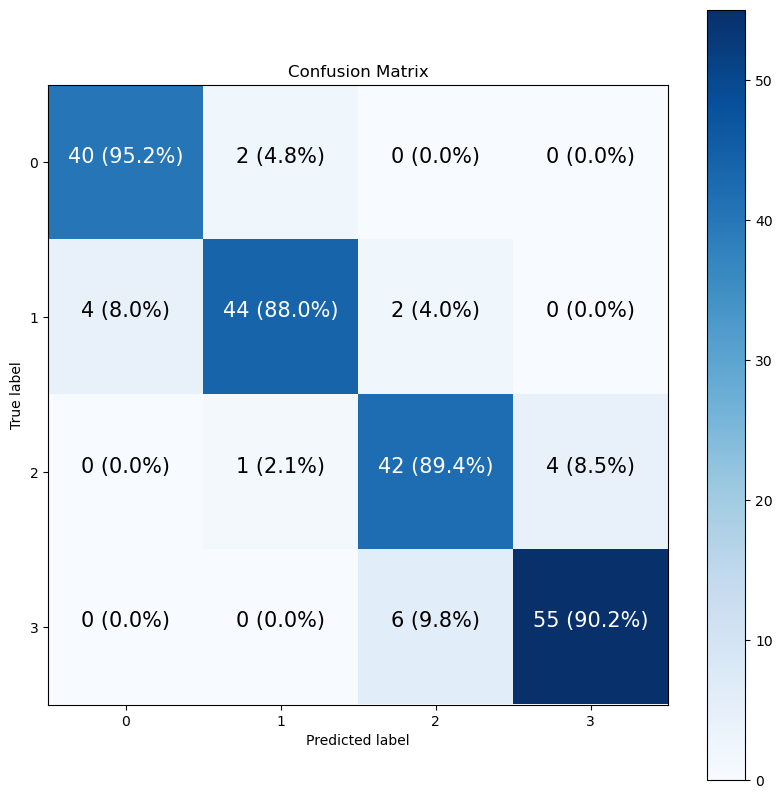

In [29]:
make_confusion_matrix(y_true=y_test, y_pred=y_pred1, classes=[0, 1, 2, 3])

<Axes: >

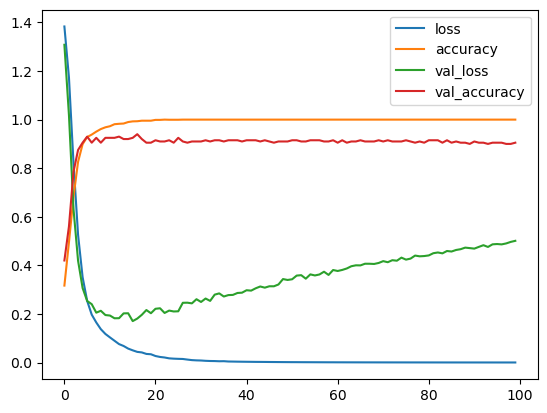

In [30]:
pd.DataFrame(history1.history).plot()

### Model 2

In [31]:
model2.evaluate(X_test_norm, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1527 - accuracy: 0.9350


[0.1526588648557663, 0.9350000023841858]

In [32]:
y_pred2 = tf.argmax(model2.predict(X_test_norm), axis=1)

7/7 [==============================] - 0s 2ms/step


In [33]:
y_pred2

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([3, 0, 2, 2, 2, 0, 0, 2, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 1, 1, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 3,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 1, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 1, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 1, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0])>

In [34]:
evaluation_report(y_test, y_pred2)

Accuracy Score : 0.935
Precision Score : 0.9383605428796223
Recall Score : 0.932345325294401
F1 Score : 0.9335242383582777
[[40  2  0  0]
 [ 1 49  0  0]
 [ 0  5 39  3]
 [ 0  0  2 59]]


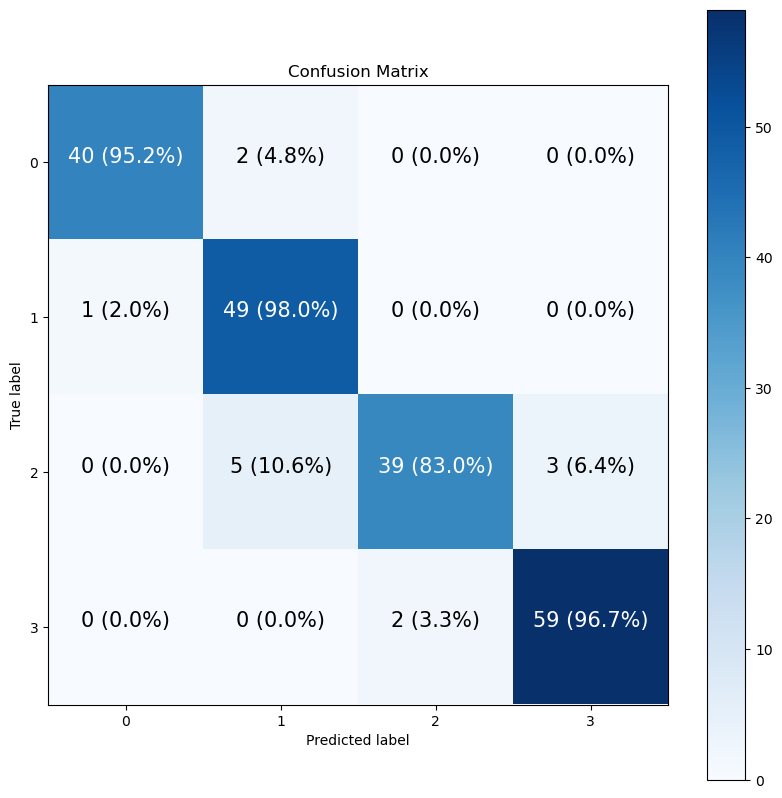

In [35]:
make_confusion_matrix(y_true=y_test, y_pred=y_pred2, classes=[0, 1, 2, 3])

<Axes: >

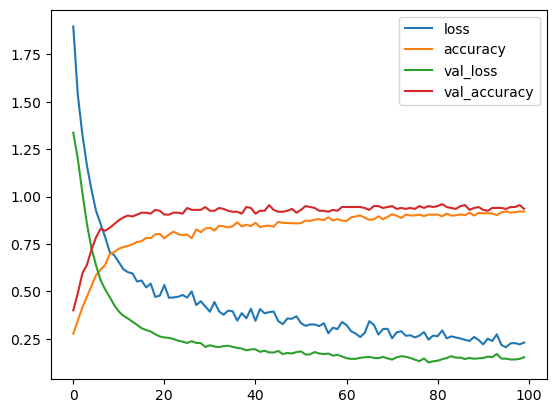

In [36]:
pd.DataFrame(history2.history).plot()

## Model 3

In [37]:
model3.evaluate(X_test_norm, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1279 - accuracy: 0.9500


[0.12794871628284454, 0.949999988079071]

In [38]:
y_pred3 = tf.argmax(model3.predict(X_test_norm), axis=1)

7/7 [==============================] - 0s 2ms/step


In [39]:
y_pred3

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([3, 0, 2, 1, 3, 0, 0, 2, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 1, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0])>

In [40]:
evaluation_report(y_test, y_pred3)

Accuracy Score : 0.95
Precision Score : 0.9495743019914628
Recall Score : 0.9495743019914628
F1 Score : 0.9495743019914628
[[41  1  0  0]
 [ 1 47  2  0]
 [ 0  2 43  2]
 [ 0  0  2 59]]


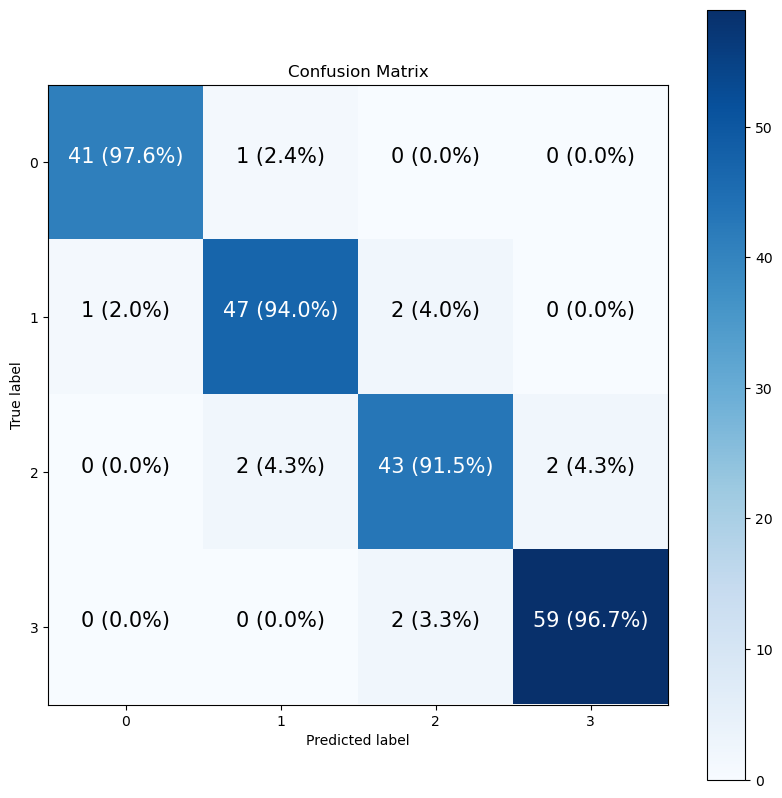

In [41]:
make_confusion_matrix(y_true=y_test, y_pred=y_pred3, classes=[0, 1, 2, 3])

<Axes: >

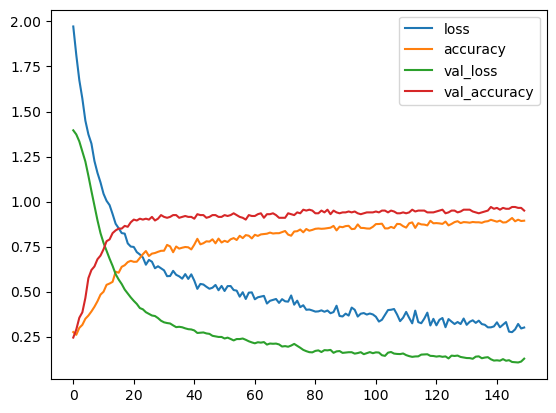

In [42]:
pd.DataFrame(history3.history).plot()

## Single Predictions

In [43]:
def single_predictions_test_data(index):
    y_true = y_test.iloc[index]
    input_tensor = tf.expand_dims(tf.constant(X_test_norm[index]), axis=0)
    y_pred = tf.argmax(model3.predict(input_tensor), axis=1)
    print('------------------------------')
    print(f'y true : {y_true}')
    print(f'y pred : {y_pred}')

In [44]:
single_predictions_test_data(3)

1/1 [==============================] - 0s 110ms/step
------------------------------
y true : 2
y pred : [1]


In [45]:
single_predictions_test_data(9)

1/1 [==============================] - 0s 19ms/step
------------------------------
y true : 1
y pred : [1]


In [46]:
single_predictions_test_data(45)

1/1 [==============================] - 0s 18ms/step
------------------------------
y true : 3
y pred : [3]


In [47]:
columns_to_delete = ['id']
test_df = test_df.drop(columns=columns_to_delete)

In [48]:
def single_predictons_new_data(index):
    input_tensor = scaler.transform(tf.expand_dims(tf.constant(test_df.loc[index]), axis=0))
    y_pred = tf.argmax(model3.predict(input_tensor), axis=1)
    print(y_pred)

In [49]:
single_predictons_new_data(3)

1/1 [==============================] - 0s 18ms/step
tf.Tensor([3], shape=(1,), dtype=int64)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
single_predictons_new_data(2)

1/1 [==============================] - 0s 18ms/step
tf.Tensor([2], shape=(1,), dtype=int64)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [51]:
single_predictons_new_data(34)

1/1 [==============================] - 0s 18ms/step
tf.Tensor([1], shape=(1,), dtype=int64)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Saving the Model

In [52]:
model3.save('mobile_price_classification_model.h5')